In [1]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Planet Generation Function
def planet_generation(radius, x, y, z):
    dummy_array = []
    dummy_array.append(radius)
    dummy_array.append(x)
    dummy_array.append(y)
    dummy_array.append(z)
    return dummy_array

In [3]:
#Particle Generation
def particle_generation(pos_x, pos_y, pos_z, vel_x, vel_y, vel_z):
    dummy_array = []
    dummy_array.append(pos_x)
    dummy_array.append(pos_y)
    dummy_array.append(pos_z)
    dummy_array.append(vel_x)
    dummy_array.append(vel_y)
    dummy_array.append(vel_z)
    return dummy_array

In [4]:
def particle_update(planets, particles, timestep):
    for i in range(particles_len):
        force_vec = [0, 0, 0]
        for j in range(planet_len):
            den = (particles[i][1] - planets[j][1]) ** 2 + (particles[i][2] - planets[j][2]) ** 2 
            + (particles[i][3] - planets[j][3]) ** 2
            k = planets[j][0] ** 3 / den 
            force_vec[0] = force_vec[0] + k * (planets[j][1] - particles[i][1])/(den ** 0.5)
            force_vec[1] = force_vec[1] + k * (planets[j][2] - particles[i][2])/(den ** 0.5)
            force_vec[2] = force_vec[2] + k * (planets[j][3] - particles[i][3])/(den ** 0.5)
        
        particles[i][3] = particles[i][3] + timestep * force_vec[0] 
        particles[i][4] = particles[i][4] + timestep * force_vec[1]
        particles[i][5] = particles[i][5] + timestep * force_vec[2]
        
        particles[i][0] = particles[i][0] + timestep * particles[i][3]
        particles[i][1] = particles[i][1] + timestep * particles[i][4]
        particles[i][2] = particles[i][2] + timestep * particles[i][5]
        
    return

In [5]:
#Testing
par1 = particle_generation(100, 100, 100, 1, 1, 1 )
p1 = planet_generation(40, 0, 0, 0)
p2 = planet_generation(50, 40, 10, 0)
p3 = planet_generation(-20, 30, 40, 0)
planets = [p1, p2, p3]
particles = [par1]
particles_len = len(particles)
planet_len = len(planets)
timestep = 0.01

"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p1[1], p1[2], s = p1[0])
ax.scatter(p2[1], p2[2], s = p2[0])
plt.show()
"""

"\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\nax.scatter(p1[1], p1[2], s = p1[0])\nax.scatter(p2[1], p2[2], s = p2[0])\nplt.show()\n"

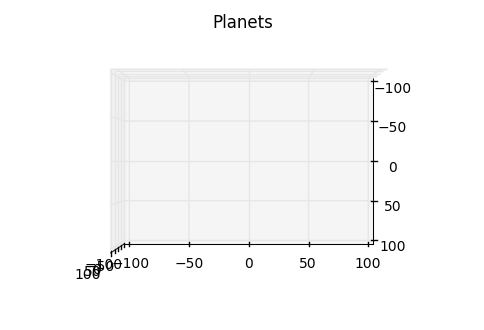

In [7]:
#Animations
grid_size = 100
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axis('on')
ax.set_xlim((-grid_size, grid_size))
ax.set_ylim((-grid_size, grid_size))
ax.set_zlim((-grid_size, grid_size))
ax.set_title('Planets')

ax.view_init(90, 0)


line1, = ax.plot([], [], [], 'ro', markersize = 20)

line2, = ax.plot([], [], [], 'bo', markersize = 10)

lines= [line1, line2]

def init():
    line1.set_data([], [])
    line1.set_3d_properties([]) 
    
    line2.set_data([], [])
    line2.set_3d_properties([]) 
    return lines


def animate(i):
    global particles
    global planets
    global timestep
    s1 = [p1[1], p2[1], p3[1]]
    s2 = [p1[2], p2[2], p3[2]]
    s3 = [p1[3], p2[3], p3[3]]
    line1.set_data(s1, s2)
    line1.set_3d_properties(s3)
    
    line2.set_data(particles[0][0], particles[0][1])
    line2.set_3d_properties(particles[0][2])
    particle_update(planets, particles, timestep)
    
    ax.figure.canvas.draw()
    ax.view_init(45 + 0.05 * i, 0.05 * i)

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 500, interval = 30, blit=True)
plt.show()
HTML(anim.to_html5_video())